In [1]:
#Import required packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#Assign each dataset to dataframe
df = pd.read_csv('h1b-occ-emp.csv')
df1 = pd.read_csv('h1b-ws-emp.csv')

In [3]:
#Preview of dataset df (occupation)
df.head(10)

,rank,sponsor,num_of_lca,avg_salary,occupation
0,1,Google,"7,419","$162,039","Software Developers, Applications"
1,2,Microsoft,"5,874","$151,207","Software Developers, Applications"
2,3,"Amazon,Com Services","4,256","$139,359","Software Developers, Applications"
3,4,Meta Platforms,"2,070","$183,224","Software Developers, Applications"
4,5,Capgemini,"2,006","$111,473","Software Developers, Applications"
5,6,Wal-Mart Associates,"1,923","$134,610","Software Developers, Applications"
6,7,Deloitte Consulting,"1,831","$120,585","Software Developers, Applications"
7,8,J P Morgan Chase & Co,"1,807","$140,312","Software Developers, Applications"
8,9,Compunnel Software Group,"1,292","$110,995","Software Developers, Applications"
9,10,Ernst Young,"1,284","$142,836","Software Developers, Applications"


In [4]:
#Preview of dataset df1 (workcity)
df1.head(10)

,rank,sponsor,num_of_lca,avg_salary,work_state
0,1,Ernst Young,"1,246","$135,821","New York, NY"
1,2,Google,"1,036","$169,638","New York, NY"
2,3,"Amazon,Com Services",929,"$144,480","New York, NY"
3,4,"Goldman, Sachs",881,"$163,499","New York, NY"
4,5,Meta Platforms,567,"$185,422","New York, NY"
5,6,J P Morgan Chase & Co,548,"$167,639","New York, NY"
6,7,Morgan Stanley Services Group,438,"$154,729","New York, NY"
7,8,Columbia University,435,"$101,187","New York, NY"
8,9,Citibank,395,"$171,231","New York, NY"
9,10,Bloomberg,369,"$198,043","New York, NY"


**Data Cleaning for df (occupation)**

In [5]:
#First find if there's any null values in df
df.count()

rank          31115
sponsor       31115
num_of_lca    31079
avg_salary    31079
occupation    31079
dtype: int64

In [6]:
#It is shown that avg_salary and occupation has null values, or total of 36 null values
#Below is the preview of rows that have null values
null = df[df.isna().any(axis=1)].shape
null_row = df[df.isna().any(axis=1)]
print(null)
print(null_row)

(36, 5)
                                rank  \
10553  No records in 76 - 100 range.   
11478   No records in 51 - 75 range.   
11479  No records in 76 - 100 range.   
11879           No records in range.   
14364   No records in 51 - 75 range.   
14365  No records in 76 - 100 range.   
17032  No records in 76 - 100 range.   
17556   No records in 51 - 75 range.   
17557  No records in 76 - 100 range.   
17614  No records in 76 - 100 range.   
17767  No records in 76 - 100 range.   
18246  No records in 76 - 100 range.   
18304  No records in 76 - 100 range.   
18378  No records in 76 - 100 range.   
19390   No records in 51 - 75 range.   
19391  No records in 76 - 100 range.   
21910   No records in 51 - 75 range.   
21911  No records in 76 - 100 range.   
24578  No records in 76 - 100 range.   
25102   No records in 51 - 75 range.   
25103  No records in 76 - 100 range.   
25160  No records in 76 - 100 range.   
25313  No records in 76 - 100 range.   
25792  No records in 76 - 100 ra

In [7]:
#Drop the rows that has null values and check if there's any null left
df_c = df.dropna()
null = df_c[df_c.isna().any(axis=1)].shape
print(null)

(0, 5)


In [8]:
#Check for any duplicate values method 1
duplicate = df_c.groupby(df_c.columns.to_list()).size().reset_index(name='Count')
duplicate = duplicate[duplicate['Count'] > 1]
print(duplicate.shape)

(5098, 6)


There are 5098 unique rows that have duplicate values

In [9]:
#Check for any duplicate values method 2
duplicate = df_c[df_c.duplicated()].shape
print(duplicate)

(12632, 5)


There are total of 12632 rows that are duplicate

In [10]:
#Drop any duplicate values
df_c = df_c.drop_duplicates()
df_c = df_c.drop(df_c[df_c['occupation'] == 'Software Developers'].index)
duplicate = df_c[df_c.duplicated()].shape
print(duplicate)

(0, 5)


In [11]:
#Convert data into its proper typing
#First check the data type for each column
df_c.info()
df_c.head()

<class 'pandas.core.frame.DataFrame'>
Index: 18347 entries, 0 to 26006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        18347 non-null  object
 1   sponsor     18347 non-null  object
 2   num_of_lca  18347 non-null  object
 3   avg_salary  18347 non-null  object
 4   occupation  18347 non-null  object
dtypes: object(5)
memory usage: 860.0+ KB


,rank,sponsor,num_of_lca,avg_salary,occupation
0,1,Google,"7,419","$162,039","Software Developers, Applications"
1,2,Microsoft,"5,874","$151,207","Software Developers, Applications"
2,3,"Amazon,Com Services","4,256","$139,359","Software Developers, Applications"
3,4,Meta Platforms,"2,070","$183,224","Software Developers, Applications"
4,5,Capgemini,"2,006","$111,473","Software Developers, Applications"


In [12]:
#Notice that num_of_lca has comma (',') and avg_salary has dollar sign ($) and comma (',')
#To clean up the data, convert all columns into string
column_to_string = ['sponsor', 'num_of_lca', 'avg_salary', 'occupation']
df_c.loc[:,column_to_string] = df_c.loc[:,column_to_string].astype('string')
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18347 entries, 0 to 26006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        18347 non-null  object
 1   sponsor     18347 non-null  object
 2   num_of_lca  18347 non-null  object
 3   avg_salary  18347 non-null  object
 4   occupation  18347 non-null  object
dtypes: object(5)
memory usage: 860.0+ KB


In [13]:
#Manipulate data to delete comma and dollar sign from
df_c.loc[:,'num_of_lca'] = df_c.loc[:,'num_of_lca'].str.replace(',', '')
df_c.loc[:,'avg_salary'] = df_c.loc[:,'avg_salary'].str.replace('[$,]', '', regex=True) 
df_c.head()

,rank,sponsor,num_of_lca,avg_salary,occupation
0,1,Google,7419,162039,"Software Developers, Applications"
1,2,Microsoft,5874,151207,"Software Developers, Applications"
2,3,"Amazon,Com Services",4256,139359,"Software Developers, Applications"
3,4,Meta Platforms,2070,183224,"Software Developers, Applications"
4,5,Capgemini,2006,111473,"Software Developers, Applications"


In [14]:
#Convert num_of_lca to int and avg_salary to float
column_to_int = 'num_of_lca'
column_to_float = 'avg_salary'

df_c.loc[:,column_to_int] = df_c.loc[:,column_to_int].astype(int)
df_c.loc[:,column_to_float] = df_c.loc[:,column_to_float].astype(float)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18347 entries, 0 to 26006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        18347 non-null  object
 1   sponsor     18347 non-null  object
 2   num_of_lca  18347 non-null  object
 3   avg_salary  18347 non-null  object
 4   occupation  18347 non-null  object
dtypes: object(5)
memory usage: 860.0+ KB


**Analysis**

In [15]:
#Statistical summary of the cleaned data 
df_c.describe()

,rank,sponsor,num_of_lca,avg_salary,occupation
count,18347,18347,18347,18347.0,18347
unique,100,9318,377,12622.0,193
top,27,"Amazon,Com Services",1,120000.0,"Software Developers, Applications"
freq,201,84,4741,123.0,100


In [16]:
df_c.sort_values(by=['avg_salary'],ascending=False).head(10)

,rank,sponsor,num_of_lca,avg_salary,occupation
8410,20,Hunter Douglas,2,978500.0,Chief Executives
13498,48,African Discovery Group,1,960000.0,"Financial Specialists, All Other"
15499,14,Umc Physicians,2,879500.0,Surgeons
15523,38,University Surgical Associates,1,831000.0,Surgeons
15524,39,"The Duluth Clinic,",1,800000.0,Surgeons
7157,62,Addition Corp,2,750000.0,Financial and Investment Analysts
10383,93,Community Physicians Group,1,744000.0,"Physicians, All Other"
4598,99,Vr Strategy Consultants,2,700000.0,Financial Managers
17272,39,Mississippi Baptist Medical Center,1,700000.0,Radiologists
17271,39,Medical Foundation Of Cental Mississippi,1,700000.0,Radiologists


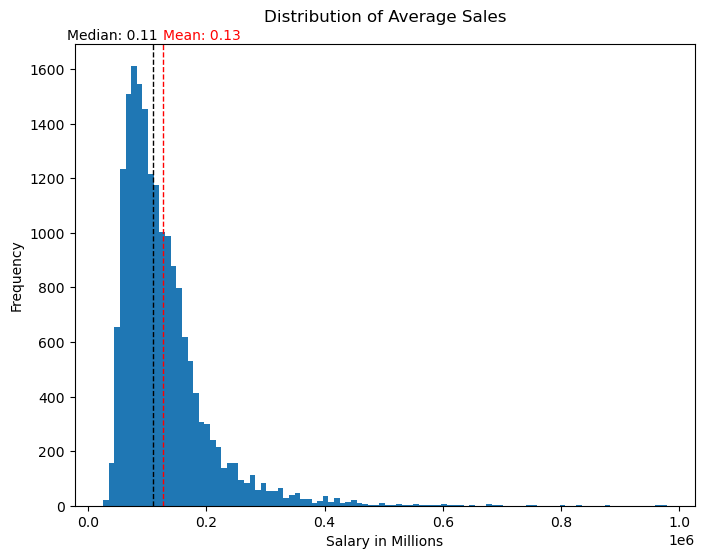

In [17]:
#Distribution of H1B sponsored salary
num_bins = 100
avg_salary = df_c.loc[:,'avg_salary']

plt.figure(figsize=(8,6))
plt.hist(avg_salary, num_bins)
mean = np.mean(avg_salary)
median = np.median(avg_salary)
plt.axvline(mean, color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(median, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.text(mean, 1710, f'Mean: {mean/1000000:.2f}', color='red')
plt.text(median-145000, 1710, f'Median: {median/1000000:.2f}', color='black')

plt.ylabel('Frequency')
plt.xlabel('Salary in Millions')
plt.title('Distribution of Average Sales', y=1.03)
plt.show()

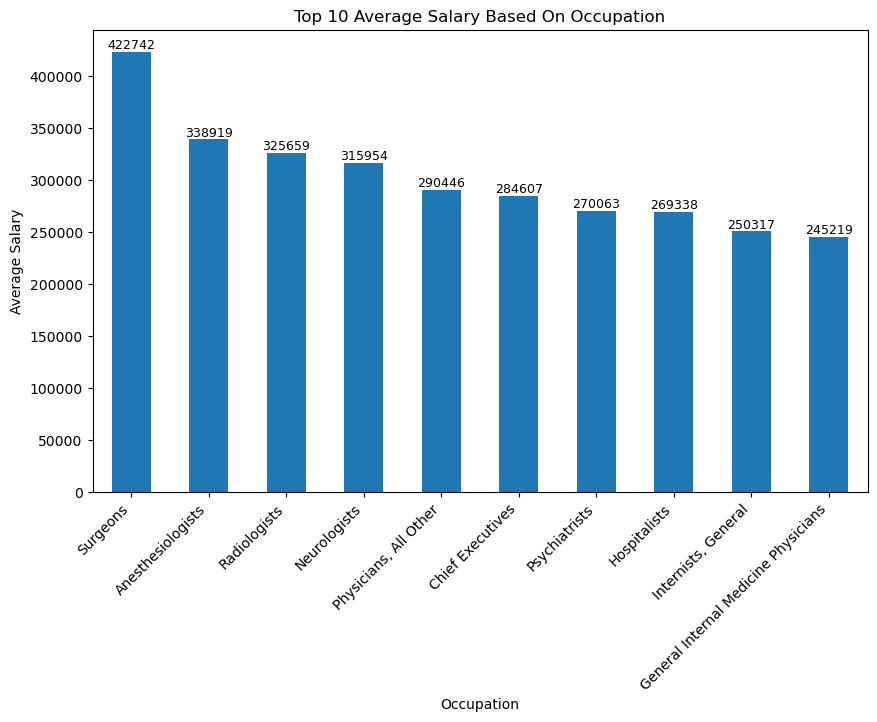

In [18]:
#Top 10 salary based on occupation
occ = df_c.groupby(['occupation'])['avg_salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
ax = occ.plot(kind='bar')
plt.xticks(rotation=45, ha='right')  # Rotate the occupation names for better readability
plt.ylabel('Average Salary')
plt.xlabel('Occupation')
plt.title('Top 10 Average Salary Based On Occupation')
for i, v in enumerate(occ):
    ax.text(i, v, str(round(v)), ha='center', va='bottom', fontsize=9)

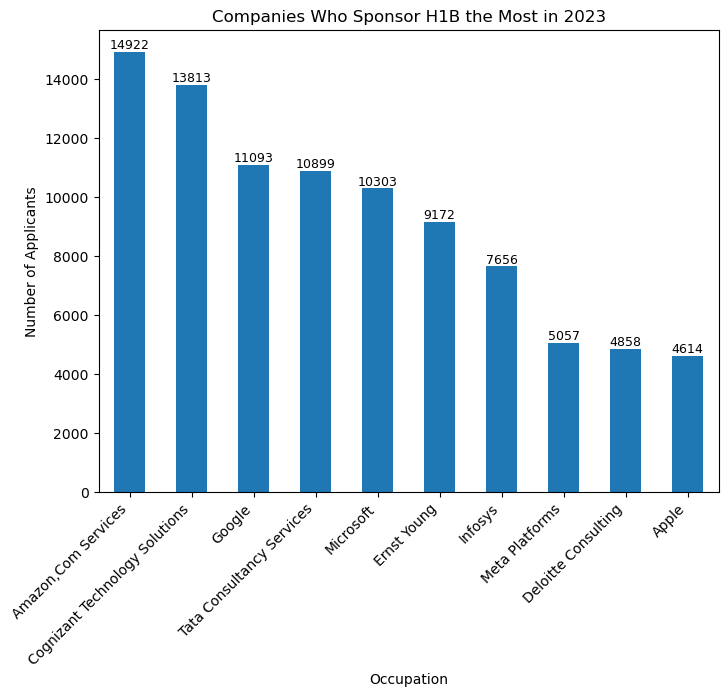

In [19]:
#Companies who sponsors the most in 2023

grouped_spon = df_c.groupby('sponsor')['num_of_lca'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
ax = grouped_spon.plot(kind='bar')
plt.title('Companies Who Sponsor H1B the Most in 2023')
plt.xlabel('Occupation')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(grouped_spon):
    ax.text(i, v, str(round(v)), ha='center', va='bottom', fontsize=9)

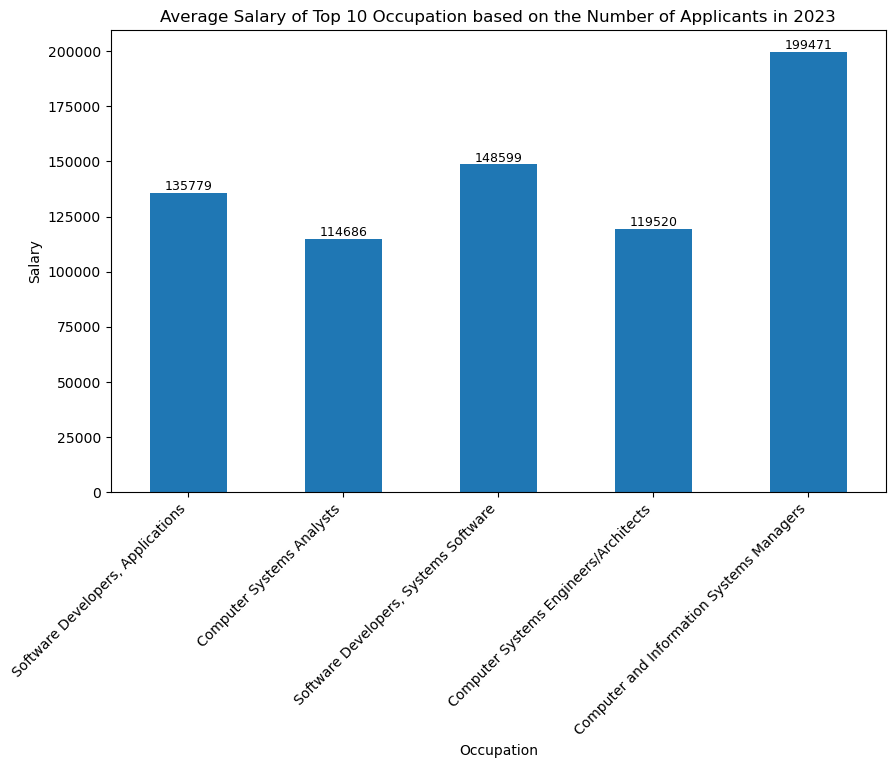

In [20]:
#Top 10 average salary by profession ordered by number of LCA

grouped_lca = df_c.groupby('occupation').agg({'avg_salary':'mean', 'num_of_lca':'sum'})
grouped_lca = grouped_lca.sort_values('num_of_lca', ascending=False).head(5)

plt.figure(figsize=(10,6))
ax = grouped_lca['avg_salary'].plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Average Salary of Top 10 Occupation based on the Number of Applicants in 2023')
plt.xlabel('Occupation')
plt.ylabel('Salary')

for i, v in enumerate(grouped_lca['avg_salary']):
    ax.text(i, v, str(round(v)), ha='center', va='bottom', fontsize=9)
plt.show()

**Data Cleaning for df1 (Workstate)**

In [21]:
#First find if there's any null values in df1
df1.count()

rank          18973
sponsor       18973
num_of_lca    18968
avg_salary    18968
work_state    18968
dtype: int64

In [22]:
null1 = df1[df1.isna().any(axis=1)].shape
null1_row = df1[df1.isna().any(axis=1)]
print(null1, null1_row)

(5, 5)                                 rank        sponsor num_of_lca avg_salary  \
12229   No records in 51 - 75 range.  San Bruno, CA        NaN        NaN   
12230   No records in 51 - 75 range.  San Bruno, CA        NaN        NaN   
15089  No records in 76 - 100 range.   La Jolla, CA        NaN        NaN   
18871   No records in 51 - 75 range.  Rochester, MN        NaN        NaN   
18872  No records in 76 - 100 range.  Rochester, MN        NaN        NaN   

      work_state  
12229        NaN  
12230        NaN  
15089        NaN  
18871        NaN  
18872        NaN  


In [23]:
df1_c = df1.dropna()
null1 = df1_c[df1_c.isna().any(axis=1)].shape
print(null1)

(0, 5)


In [24]:
duplicate = df1_c.groupby(df1_c.columns.to_list()).size().reset_index(name='Count')
duplicate = duplicate[duplicate['Count'] > 1]
print(duplicate)


      rank                          sponsor num_of_lca avg_salary  \
3798    26                    Orbit Systems          1  $122,000    
3940    27   International Software Systems          1  $114,400    
4096    28            Eversoft Technologies          1  $114,067    
4371    29                            Quber          1   $99,840    
4672    30                   Exlservice.com          1   $95,970    
...    ...                              ...        ...        ...   
13527   73                         Aspyrant          1   $91,000    
13707   74              APLOMB Technologies          1   $80,001    
13728   74  Boyd Watterson Asset Management          2   $80,000    
13949   75  Fives North American Combustion          2   $76,882    
13976   75                           Itstac          1   $80,000    

           work_state  Count  
3798   Riverwoods, IL      3  
3940   Riverwoods, IL      3  
4096   Riverwoods, IL      3  
4371   Riverwoods, IL      3  
4672   Riverwood

In [25]:
df1_c = df1_c.drop_duplicates()
df1_c[df1_c.duplicated()].shape

(0, 5)

In [26]:
df1_c['city'] = df1_c['work_state'].str.split(',').str[0].str.strip()
df1_c['state'] = df1_c['work_state'].str.split(',').str[1].str.strip()
df1_c = df1_c.drop('work_state', axis=1)

In [27]:
df1_c.head(10)

,rank,sponsor,num_of_lca,avg_salary,city,state
0,1,Ernst Young,"1,246","$135,821",New York,NY
1,2,Google,"1,036","$169,638",New York,NY
2,3,"Amazon,Com Services",929,"$144,480",New York,NY
3,4,"Goldman, Sachs",881,"$163,499",New York,NY
4,5,Meta Platforms,567,"$185,422",New York,NY
5,6,J P Morgan Chase & Co,548,"$167,639",New York,NY
6,7,Morgan Stanley Services Group,438,"$154,729",New York,NY
7,8,Columbia University,435,"$101,187",New York,NY
8,9,Citibank,395,"$171,231",New York,NY
9,10,Bloomberg,369,"$198,043",New York,NY


In [28]:
column_to_string = ['sponsor', 'num_of_lca', 'avg_salary', 'city', 'state']
df1_c.loc[:,column_to_string] = df1_c.loc[:,column_to_string].astype('string')

In [29]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18894 entries, 0 to 18972
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        18894 non-null  object
 1   sponsor     18894 non-null  object
 2   num_of_lca  18894 non-null  object
 3   avg_salary  18894 non-null  object
 4   city        18894 non-null  object
 5   state       18894 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [30]:
#Manipulate data to delete comma and dollar sign from
df1_c.loc[:,'num_of_lca'] = df1_c.loc[:,'num_of_lca'].str.replace(',', '')
df1_c.loc[:,'avg_salary'] = df1_c.loc[:,'avg_salary'].str.replace('[$,]', '', regex=True) 
df1_c.head()

,rank,sponsor,num_of_lca,avg_salary,city,state
0,1,Ernst Young,1246,135821,New York,NY
1,2,Google,1036,169638,New York,NY
2,3,"Amazon,Com Services",929,144480,New York,NY
3,4,"Goldman, Sachs",881,163499,New York,NY
4,5,Meta Platforms,567,185422,New York,NY


In [31]:
#Convert num_of_lca to int and avg_salary to float
column_to_int = 'num_of_lca'
column_to_float = 'avg_salary'

df1_c.loc[:,column_to_int] = df1_c.loc[:,column_to_int].astype(int)
df1_c.loc[:,column_to_float] = df1_c.loc[:,column_to_float].astype(float)
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18894 entries, 0 to 18972
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        18894 non-null  object
 1   sponsor     18894 non-null  object
 2   num_of_lca  18894 non-null  object
 3   avg_salary  18894 non-null  object
 4   city        18894 non-null  object
 5   state       18894 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


**Linear Regression Model**

In [32]:
#Aggregate Data

agg_df_c = df_c.groupby(['sponsor', 'occupation']).agg({
    'avg_salary' : 'mean',
    'num_of_lca' : 'sum' 
}).reset_index()



In [33]:
agg_df1_c = df1_c.groupby(['sponsor', 'state']).agg({
    'avg_salary' : 'mean',
    'num_of_lca' : 'sum'
}).reset_index()



In [34]:
m_df = pd.merge(agg_df_c, agg_df1_c, on='sponsor', how='outer', suffixes=('_occ', '_state'))
m_df.head(10)

,sponsor,occupation,avg_salary_occ,num_of_lca_occ,state,avg_salary_state,num_of_lca_state
0,0 North Ave Wakefield,Budget Analysts,77500.0,1,NaN,NaN,NaN
1,1000 Heads,Advertising and Promotions Managers,170000.0,1,NaN,NaN,NaN
2,101 Supply Chain Group,"Transportation, Storage, and Distribution Mana...",135000.0,1,NaN,NaN,NaN
3,10x Genomics,Biochemists and Biophysicists,124300.0,10,CA,147852.0,59
4,10x Genomics,Bioinformatics Scientists,138800.0,5,CA,147852.0,59
5,10x Genomics,Biomedical Engineers,113459.0,5,CA,147852.0,59
6,10x Genomics,"Engineers, All Other",130000.0,3,CA,147852.0,59
7,10x Genomics,Natural Sciences Managers,182000.0,2,CA,147852.0,59
8,10x Genomics,Physicists,151000.0,3,CA,147852.0,59
9,1220 Associates,Exercise Physiologists,106080.0,1,NaN,NaN,NaN


In [43]:
#compute average salary
m_df['avg_salary'] = (m_df.loc[:,'avg_salary_occ'] + m_df.loc[:,'avg_salary_state']) / 2

m_df_c = m_df.dropna()

m_df_c.describe()

,sponsor,occupation,avg_salary_occ,num_of_lca_occ,state,avg_salary_state,num_of_lca_state,avg_salary
count,49682,49682,49682.0,49682,49682,49682.0,49682,49682.0
unique,3207,193,8344.0,376,36,6123.0,378,46211.0
top,"Amazon,Com Services","Software Developers, Applications",120000.0,1,CA,130000.0,2,120000.0
freq,2604,1273,186.0,5163,4679,226.0,4563,19.0


In [76]:
#choosing predictors
select_index = ['sponsor', 'occupation', 'state']

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(m_df_c[select_index])


In [78]:
x = encoded_features.toarray()
y = m_df_c['avg_salary']

In [79]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [157]:
#prediction

p = pd.DataFrame({'sponsor' : ['Linkedin'],
                  'occupation': ['Database Architects'],
                  'state': ['CA']
                  })

encoded_sample = encoder.transform(p).toarray()

pred = model.predict(encoded_sample)

print(f'Predicted average salary: {pred[0]}')

Predicted average salary: 173408.0


In [103]:
#performance evaluation
pred_values = model.predict(x)
e = y - pred_values
mae = np.mean(np.abs(e))
print(mae)

9723.159374325332


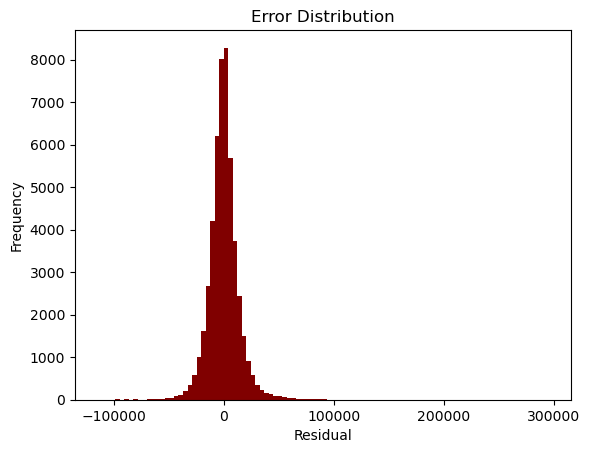

In [156]:
plt.hist(e, bins=100, color='maroon')
plt.title('Error Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()